**Task 2: Credit Risk Prediction**

Objective: 
* Predict whether a loan applicant is likely to default on a loan.

Some necessary libraries

In [ ]:
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

Training dataset

In [4]:
traindf = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Testing dataset

In [5]:
testdf = pd.read_csv("test_Y3wMUE5_7gLdaTN.csv")
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Number of rows and columns in training dataset

In [7]:
traindf.shape

(614, 13)

Number of rows in testing dataset

In [8]:
testdf.shape

(367, 12)

Training dataset summary

In [9]:
traindf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Testing dataset summary

In [10]:
testdf.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


Training dataset information

In [11]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Testing dataset information

In [12]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


**Data cleaning process**

Identifying and handling missing values

In [ ]:
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

traindf = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

traindf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

From the above table, we see that
* Gender has 13 missing values.
* Married has 3 missing values.
* Dependents has 15 missing values.
* Self_Employed has 32 missing values.
* LoanAmount hass 22 missing values.
* Loan_Amount_Term has 14 missing values.
* Credit_History has 50 missing values.

Before cleaning missing values from the train dataset

In [ ]:
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

traindf = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

traindf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


After cleaning missing values from the dataset

In [ ]:
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

traindf = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

cleantraindf = traindf.dropna()
cleantraindf

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Cleaned train dataset file

In [30]:
cleantraindf.to_csv('Cleanedtraindataset.csv', index = False)

**Using the cleaned dataset to visualize and train/evaluate necessary machine Learning models**

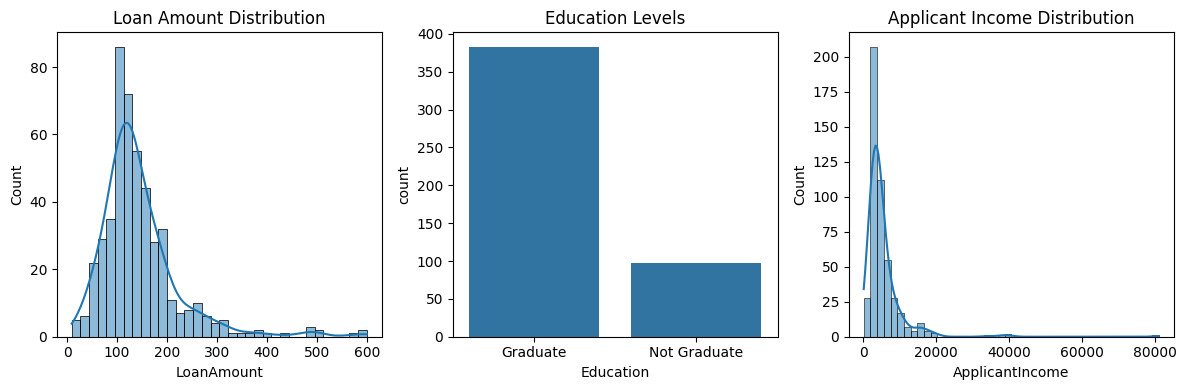

Logistic Regression Accuracy: 70.83%


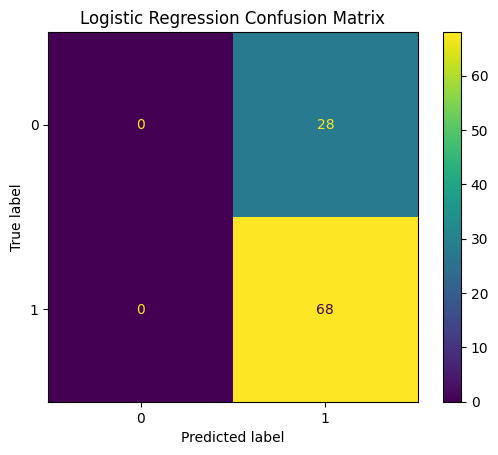

Decision Tree Accuracy: 60.42%


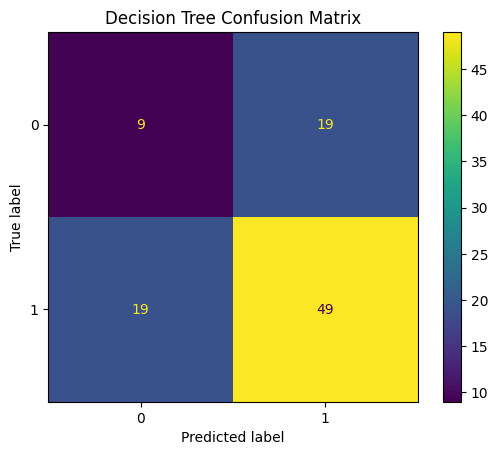

In [1]:
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

traindf = pd.read_csv("Cleanedtraindataset.csv")

# Handle categorical variables using label encoder
le = LabelEncoder()

if 'Education' in traindf.columns:
    traindf['Education'] = le.fit_transform(traindf['Education'])

# Visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(traindf['LoanAmount'], kde = True)
plt.title('Loan Amount Distribution')

plt.subplot(1, 3, 2)
sns.countplot(x='Education', data = traindf)
plt.title('Education Levels')
plt.xticks([0, 1], ['Graduate', 'Not Graduate'])

plt.subplot(1, 3, 3)
sns.histplot(traindf['ApplicantIncome'], kde = True)
plt.title('Applicant Income Distribution')

plt.tight_layout()
plt.show()

# Features and target
features = ['LoanAmount', 'Education', 'ApplicantIncome']
X = traindf[features]
y = traindf['Loan_Status']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Logistic Regression
lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    print(f"{model_name} Accuracy: {acc*100:.2f}%")
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm)
    disp.plot()
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Evaluating Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Evaluating Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")


Here's a breakdown of what each visualization indicates:

1. Data distributions (Top part):

Loan Amount Distribution:

This histogram shows that the majority of loan amounts are concentrated in the lower range, with a long tail extending towards higher amounts. This suggests that smaller loans are more common in the dataset.

Education Levels:

This bar chart indicates that a significantly higher number of applicants are "Graduate" compared to "Not Graduate". This highlights an imbalance in the education distribution within the dataset.

Applicant Income Distribution:

This histogram, similar to "Loan Amount", shows that most applicants have lower incomes, with a few outliers having very high incomes.

2. Model performance - Logistic Regression:

Logistic Regression Accuracy (70.83%):

This is the overall accuracy score for the Logistic Regression model, meaning it correctly predicted the outcome (likely loan approval/disapproval) for 70.83% of the cases in the test set.

Confusion matrix of logistic regression:

True Label 0, Predicted Label 0 (Top-Left: 0):

True Negatives (TN): This indicates that the model correctly predicted 0 instances belonging to class 0 (e.g., loan disapproved) as class 0. This value being 0 means that the model never predicts class 0, or there are no instances of class 0 in the true labels within the test set.

True Label 0, Predicted Label 1 (Top-Right):

False Positives (FP): 28 instances that actually belonged to class 0 were incorrectly predicted as class 1. These are False Positives.

True Label 1, Predicted Label 0 (Bottom-Left: 0):

False Negatives (FN): This indicates that the model correctly predicted 0 instances belonging to class 1 as class 0. Similar to the top-left, this being 0 is problematic.

True Label 1, Predicted Label 1 (Bottom-Right):

True Positives (TP): 68 instances that actually belonged to class 1 were correctly predicted as class 1. These are True Positives.

3. Model performance - Decision tree:

Decision tree Accuracy (60.42%):

The overall accuracy of the Decision Tree model is 60.42%, which means that it correctly predicted the outcome in the train dataset.

Confusion matrix of decision tree:

True Label 0, Predicted Label 0 (Top-Left cell: 9):

True Negatives (TN): The model correctly predicted 9 instances as belonging to class 0.

True Label 0, Predicted Label 1 (Top-Right cell: 19):

False Positives (FP): The model incorrectly predicted 19 instances as belonging to class 1 when they were actually class 0.

True Label 1, Predicted Label 0 (Bottom-Left cell: 19):

False Negatives (FN): The model incorrectly predicted 19 instances as belonging to class 0 when they were actually class 1.

True Label 1, Predicted Label 1 (Bottom-Right cell: 49):

True Positives (TP): The model correctly predicted 49 instances as belonging to class 1.

Overall Summary and Comparison:

Data Characteristics: 

The dataset exhibits skewed distributions for loan amount and applicant income, and a significant imbalance in education levels, with "Graduate" being dominant. These characteristics can impact model performance, especially if not addressed.

Logistic Regression:

While it has a higher reported accuracy (70.83%), its confusion matrix reveals a critical flaw: it appears to be always predicting class 1. This suggests the model is not learning to distinguish between the two classes and is simply predicting the majority class, which can lead to misleadingly high accuracy if one class is heavily dominant. This model is essentially useless for making actual predictions if discriminating between classes is important.

Decision Tree:

The model achieved an accuracy of 60.42%, which means that 6 out of 10 predictions made by the Decision Tree model were correct. It correctly identified 49 positive cases (True Positives) and 9 negative cases (True Negatives).

However, it made a significant number of errors in its confusion matrix:

* It incorrectly classified 19 actual negative cases as positive (False Positives).
* It incorrectly classified 19 actual positive cases as negative (False Negatives).

Overall, an accuracy of 60.42% still indicates that the model has substantial room for improvement in its predictive capabilities. Further tuning, feature engineering, or exploring other models would likely be beneficial.

As for the classes 0 and 1, Label encoder is used in the source code mentioned above. It is necessary because in the cleaned train dataset, the column 'Education' has 2 outcomes: graduate or not graduate. The LabelEncoder converts these text categories into numerical labels (e.g., 'Graduate' → 0, 'Not Graduate' → 1). Machine learning models like Logistic Regression and Decision Trees generally require numerical input, so without this step, the training model would fail.